# Burning Forest

## Installing Dependencies

In [2]:
!pip install matplotlib

     |████████████████████████████████| 9.2 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 20.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 18.1 MB/s eta 0:00:01


## Copying Template

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML  # for embedded matplotlib animation
from math import *
from random import *

matplotlib.rc('animation', html='html5')

## Constants

In [5]:
global EMPTY, TREE, BURNING
EMPTY = 0
TREE = 1
BURNING = 2

## Make the Forest

In [6]:
def initForest(n, probTree, probBurning):
    forest = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            if (random() < probTree):
                if (random() < probBurning):
                    forest[i, j] = BURNING
                else:
                    forest[i, j] = TREE
            else:
                forest[i, j] = EMPTY
    return forest

## Burning the Forest

In [7]:
def spread(site, N, E, S, W, probLightning, probImmune):
    if (site == EMPTY):
        newSite = EMPTY
    else:
        if (site == BURNING):
            newSite = EMPTY
        else:
            if (N == BURNING or E == BURNING or S == BURNING or W == BURNING):
                if (random() < probImmune):
                    newSite = TREE
                else:
                    newSite = BURNING
            else:
                if (random() < probLightning * (1 - probImmune)):
                    newSite = BURNING
                else:
                    newSite = TREE
    return newSite

## Extending the Grid

In [8]:
def reflectingLat(lat):
    latNS = np.row_stack((lat[0], lat, lat[-1]))
    return np.column_stack((latNS[:,0], latNS, latNS[:,-1]))

## Update Grid

In [9]:
def applyExtended(latExt, probLightning, probImmune):
    n = latExt.shape[0] - 2
    newLat = np.zeros((n, n))

    for i in range(1, n + 1):
        for j in range(1, n + 1):
            site = latExt[i, j]
            N = latExt[i - 1, j]
            E = latExt[i, j + 1]
            S = latExt[i + 1, j]
            W = latExt[i, j - 1]
            newLat[i - 1, j - 1] = spread(site, N, E, S, W, probLightning, probImmune)
    return newLat

## Fire the Grid

In [10]:
def fire(n, probTree, probBurning, probLightning, probImmune, t):
    forest  = initForest( n, probTree, probBurning )

    # Perform simulation
    grids = np.zeros((t + 1, n, n))
    grids[0, :, :] = forest
    for i in range(1, t + 1):
        forestExtended = reflectingLat(forest)
        forest = applyExtended(forestExtended, probLightning, probImmune)
        grids[i, :, :] = forest
    return grids

## Animation Setup

In [12]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

## Colouring

In [13]:
def makeColorGrid(grid):
    n = grid.shape[0]
    colorGrid = np.zeros((n, n, 3))
    colorGrid[:, :, 0] = 1
    colorGrid[:, :, 1] = 1
    for i in range(0, n):
        for j in range(0, n):
            if (grid[i, j] == TREE):
                colorGrid[i, j, 0] = 0.1
                colorGrid[i, j, 1] = 0.75
                colorGrid[i, j, 2] = 0.02
            if (grid[i, j] == BURNING):
                colorGrid[i, j, 0] = 0.6
                colorGrid[i, j, 1] = 0.2
                colorGrid[i, j, 2] = 0.1
    return colorGrid

## Simulation

In [ ]:
seed(1)
grids = fire(15, 0.8, 0.001, 0.001, 0.3, 20)

## Plot View

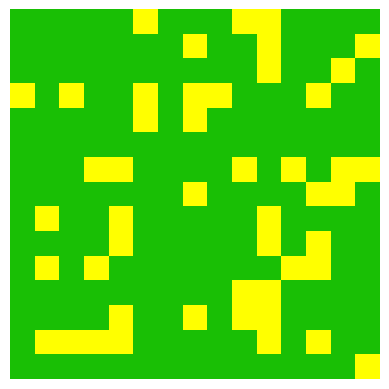

In [17]:
fig = plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGrid(grids[0,:,:]), animated=True)

# The animation function: called to produce a frame for each generation.
def updatefig(i, *args):
    global grids
    im.set_array(makeColorGrid(grids[i,:,:]))
    return im,

grid_ani = animation.FuncAnimation(fig, updatefig, save_count = len(grids),
                                   interval=50, blit=False)
plt.show()

# To save the animation, use the command, placed before HTML:
grid_ani.save('Fire.mp4', writer=writer)

HTML(grid_ani.to_html5_video())